# Import Packages

In [650]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import sklearn.ensemble  
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word

In [651]:
df = pd.read_csv('C:/Data Science/TwitterSentimentAnalysis/train.csv')
df1 = pd.read_csv('C:/Data Science/TwitterSentimentAnalysis/test.csv')# use / not this \

In [652]:
df.head(10)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
5,966,#technews One lone dude awaits iPad 2 at Apple...,1
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,883,I think I might go all weekend without seeing ...,2


# Analyzing The Data

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


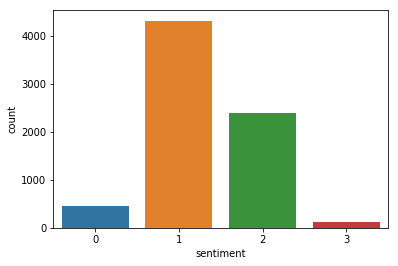

In [654]:
sns.countplot(x="sentiment",data=df)
#0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

# Data Wrangling

In [655]:
df.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

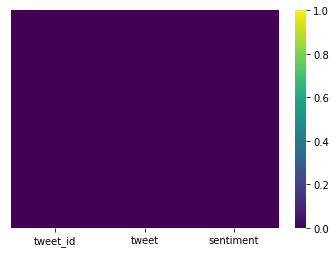

In [656]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
#1 Missing Value 

In [657]:
df.drop("tweet_id",axis=1,inplace=True)

In [658]:
df.head(10)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1
5,#technews One lone dude awaits iPad 2 at Apple...,1
6,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,NU user RT @mention New #UberSocial for #iPhon...,1
8,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,I think I might go all weekend without seeing ...,2


In [659]:
df.dropna(inplace=True)
#Dropping The Column

In [660]:
df.isnull().sum()

tweet        0
sentiment    0
dtype: int64

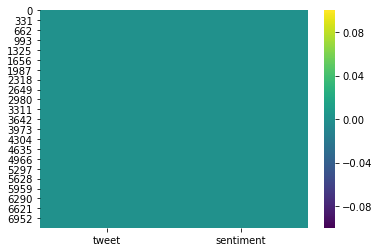

In [661]:
sns.heatmap(df.isnull(), linecolor="red",cmap="viridis") 
# Perfectly Clean Data

In [662]:
df.head(5)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


# Exploratory Data Analysis


In [663]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,#sxswnui #sxsw #apple defining language of tou...,12
1,Learning ab Google doodles! All doodles should...,19
2,one of the most in-your-face ex. of stealing t...,23
3,This iPhone #SXSW app would b pretty awesome i...,19
4,Line outside the Apple store in Austin waiting...,15


In [664]:
df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,#sxswnui #sxsw #apple defining language of tou...,89
1,Learning ab Google doodles! All doodles should...,143
2,one of the most in-your-face ex. of stealing t...,132
3,This iPhone #SXSW app would b pretty awesome i...,125
4,Line outside the Apple store in Austin waiting...,77


In [665]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,#sxswnui #sxsw #apple defining language of tou...,6.500000
1,Learning ab Google doodles! All doodles should...,6.578947
2,one of the most in-your-face ex. of stealing t...,5.000000
3,This iPhone #SXSW app would b pretty awesome i...,5.631579
4,Line outside the Apple store in Austin waiting...,4.500000


In [666]:
stop = stopwords.words('english')
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['tweet','stopwords']].head()

,tweet,stopwords
0,#sxswnui #sxsw #apple defining language of tou...,2
1,Learning ab Google doodles! All doodles should...,4
2,one of the most in-your-face ex. of stealing t...,7
3,This iPhone #SXSW app would b pretty awesome i...,4
4,Line outside the Apple store in Austin waiting...,4


In [667]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [668]:
df['hastags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['tweet','hastags']].head()

,tweet,hastags
0,#sxswnui #sxsw #apple defining language of tou...,3
1,Learning ab Google doodles! All doodles should...,2
2,one of the most in-your-face ex. of stealing t...,1
3,This iPhone #SXSW app would b pretty awesome i...,3
4,Line outside the Apple store in Austin waiting...,1


In [669]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags
0,#sxswnui #sxsw #apple defining language of tou...,1,12,89,6.500000,2,3
1,Learning ab Google doodles! All doodles should...,1,19,143,6.578947,4,2
2,one of the most in-your-face ex. of stealing t...,2,23,132,5.000000,7,1
3,This iPhone #SXSW app would b pretty awesome i...,0,19,125,5.631579,4,3
4,Line outside the Apple store in Austin waiting...,1,15,77,4.500000,4,1


In [670]:
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['tweet','numerics']].head()
#Total Number Present

,tweet,numerics
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,0
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,0


In [671]:
df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['tweet','upper']].head()
#Upper Case Characters Presnt in Datset

,tweet,upper
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,1
4,Line outside the Apple store in Austin waiting...,1


In [672]:
df.tail(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
7269,@mention Google plze Tammi. I'm in middle of ...,1,16,93,5.200000,4,1,0,1
7270,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,15,91,5.133333,2,5,0,1
7271,RT @mention Aha! Found proof of lactation room...,1,22,140,5.409091,5,1,0,2
7272,We just launched our iPad app at #SXSW! Get al...,1,18,92,4.166667,6,1,0,2
7273,"The next fin serv battle is vs Apple, GOOG, Mo...",1,23,137,5.000000,4,2,0,2


#  Data Preprocessing And Cleaning

In [673]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'].head()
#Making Everything in LowerCase No Repeatations

0    #sxswnui #sxsw #apple defining language of tou...
1    learning ab google doodles! all doodles should...
2    one of the most in-your-face ex. of stealing t...
3    this iphone #sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [674]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet'].head()
#REMOVING THE PUNCTUCATION

0    sxswnui sxsw apple defining language of touch ...
1    learning ab google doodles all doodles should ...
2    one of the most inyourface ex of stealing the ...
3    this iphone sxsw app would b pretty awesome if...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [675]:
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()
# Removing Stopwords

0    sxswnui sxsw apple defining language touch dif...
1    learning ab google doodles doodles light funny...
2    one inyourface ex stealing show yrs rt mention...
3    iphone sxsw app would b pretty awesome didnt c...
4    line outside apple store austin waiting new ip...
Name: tweet, dtype: object

In [676]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
#Commonly Used Words And Thier Count

In [677]:
freq

sxsw       7540
mention    5512
link       3427
rt         2344
ipad       1912
google     1862
apple      1729
iphone     1215
store      1188
new         862
dtype: int64

In [678]:
freq = list(freq.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['tweet'].head()
#Removing the Common Words

0    sxswnui defining language touch different dial...
1    learning ab doodles doodles light funny amp in...
2    one inyourface ex stealing show yrs quotat sch...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet, dtype: object

In [679]:
freq1 = pd.Series(' '.join(df['tweet']).split()).value_counts()[-10:]
# Rare Words From Dataset

In [680]:
freq1

budget         1
funnysad       1
checkingout    1
spinning       1
ltanxiety      1
wnt            1
jobsco         1
relive         1
unlocking      1
luggage        1
dtype: int64

In [681]:
freq1 = list(freq1.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
df['tweet'].head()
#Removing Rare Words From Dataset

0    sxswnui defining language touch different dial...
1    learning ab doodles doodles light funny amp in...
2    one inyourface ex stealing show yrs quotat sch...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet, dtype: object

In [682]:
df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))
#Words Correction analytics and analtycs

0    sxswnui defining language touch different dial...
1    learning ab doubles doubles light funny amp in...
2    one inyourface ex stealing show yes quotas sch...
3    pp would b pretty awesome didn crash every 10m...
4                          line outside austin waiting
Name: tweet, dtype: object

In [683]:
TextBlob(df['tweet'][1]).words

WordList(['learning', 'ab', 'doodles', 'doodles', 'light', 'funny', 'amp', 'innovative', 'exceptions', 'significant', 'occasions', 'googledoodle'])

In [684]:
st = PorterStemmer()
df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#removal of suffices, like “ing”, “ly”, “s”, etc. 

0    sxswnui defin languag touch differ dialect bec...
1    learn ab doodl doodl light funni amp innov exc...
2    one inyourfac ex steal show yr quotat school m...
3    app would b pretti awesom didnt crash everi 10...
4                              line outsid austin wait
Name: tweet, dtype: object

In [685]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


# Advanced Text Processing

In [686]:
TextBlob(df['tweet'][0]).ngrams(2)
#N-grams are the combination of multiple words used together. 

[WordList(['sxswnui', 'defining']),
 WordList(['defining', 'language']),
 WordList(['language', 'touch']),
 WordList(['touch', 'different']),
 WordList(['different', 'dialects']),
 WordList(['dialects', 'becoming']),
 WordList(['becoming', 'smaller'])]

In [687]:
tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1
#Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

,words,tf
0,doodles,2
1,ab,1
2,light,1
3,occasions,1
4,learning,1
5,googledoodle,1
6,funny,1
7,exceptions,1
8,amp,1
9,significant,1


In [688]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['tweet'].str.contains(word)])))
tf1
#The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing
#in all the documents.

,words,tf,idf
0,doodles,2,5.800882
1,ab,1,2.787131
2,light,1,4.687232
3,occasions,1,8.891924
4,learning,1,6.326975
5,googledoodle,1,6.183874
6,funny,1,5.947485
7,exceptions,1,8.891924
8,amp,1,2.349452
9,significant,1,8.891924


In [689]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1
#TF-IDF is the multiplication of the TF and IDF which we calculated above.

,words,tf,idf,tfidf
0,doodles,2,5.800882,11.601763
1,ab,1,2.787131,2.787131
2,light,1,4.687232,4.687232
3,occasions,1,8.891924,8.891924
4,learning,1,6.326975,6.326975
5,googledoodle,1,6.183874,6.183874
6,funny,1,5.947485,5.947485
7,exceptions,1,8.891924,8.891924
8,amp,1,2.349452,2.349452
9,significant,1,8.891924,8.891924


In [690]:
df_copy=df

In [691]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [692]:
df.drop(["word_count","char_count","avg_word","hastags","numerics","upper","stopwords"],inplace=True,axis=1)

In [693]:
df.head(5)

,tweet,sentiment
0,sxswnui defining language touch different dial...,1
1,learning ab doodles doodles light funny amp in...,1
2,one inyourface ex stealing show yrs quotat sch...,2
3,app would b pretty awesome didnt crash every 1...,0
4,line outside austin waiting,1


In [694]:
df.to_csv('newtwitter.csv') 

# MODEL

In [695]:
!pip install WordCloud

In [696]:
from wordcloud import WordCloud
from PIL import Image
import requests

In [697]:
all_words = ' '.join([text for text in df['tweet']])

In [698]:
mask = np.array(Image.open(requests.get('https://lofrev.net/wp-content/photos/2016/07/twitter_logo.jpg', stream=True).raw))

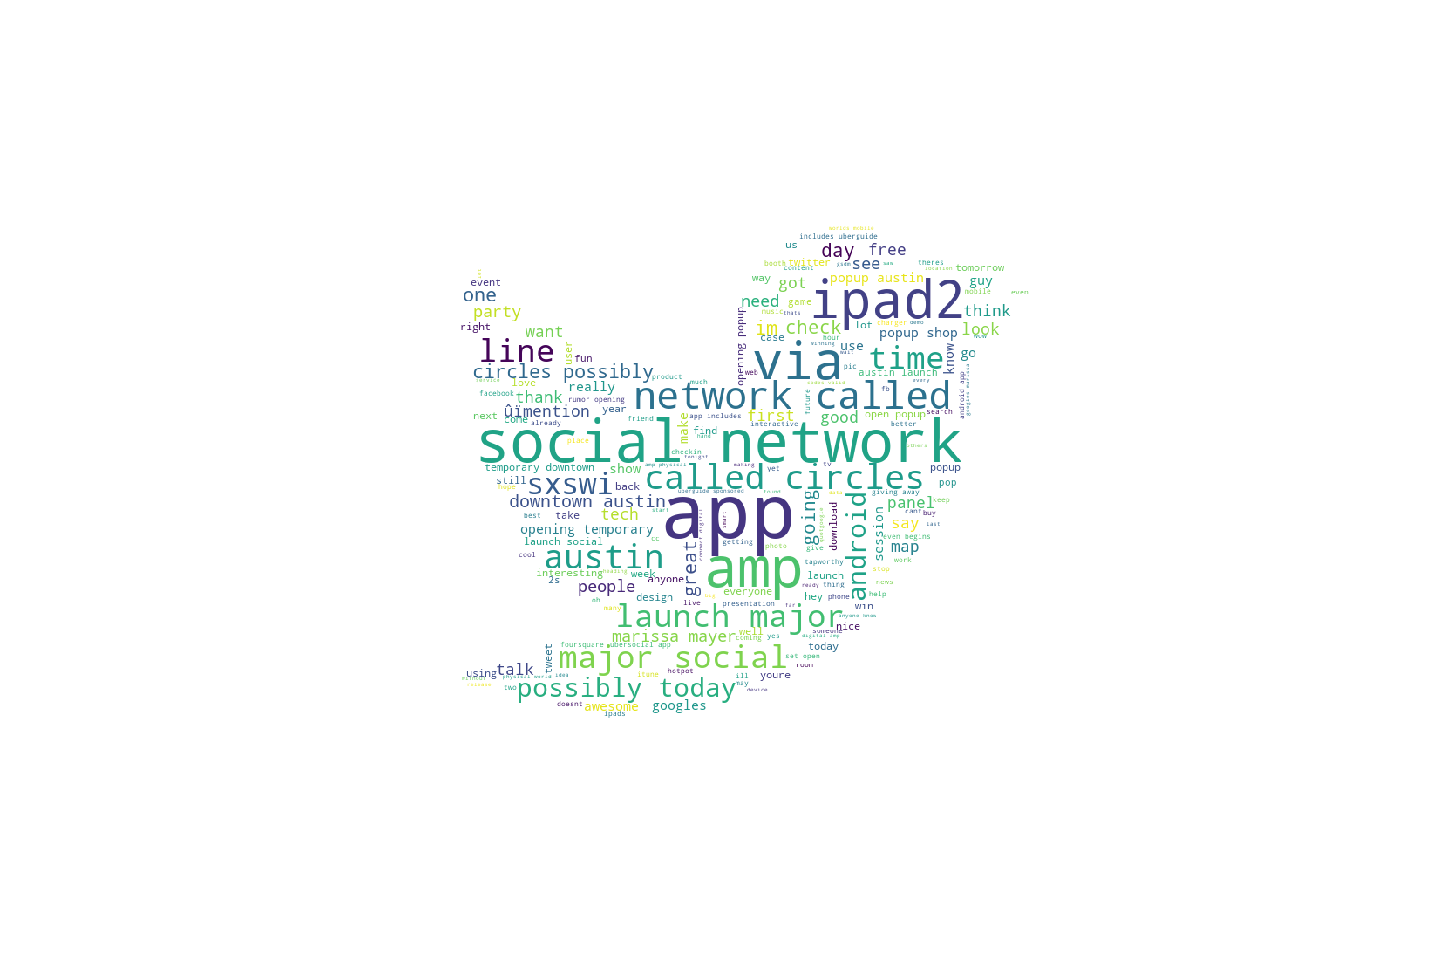

In [699]:
def generate_wordcloud(all_words, mask):
    word_cloud = WordCloud(width = 900, height = 600, background_color='white', mask=mask).generate(all_words)
    plt.figure(figsize=(20,18),facecolor = 'white', edgecolor='blue')
    plt.figure
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(all_words,mask)

# Model

In [700]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df_copy['tweet'])

train_vect

<7273x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 36486 stored elements in Compressed Sparse Row format>

In [701]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df_copy['tweet'])
train_bow
#Bag of Words

<7273x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 40113 stored elements in Compressed Sparse Row format>

In [702]:
df_copy['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0          (0.15, 0.65)
1    (0.38125, 0.89375)
2            (0.0, 0.0)
3          (0.625, 1.0)
4           (0.0, 0.05)
Name: tweet, dtype: object

In [703]:
df_copy['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
df_copy[['tweet','sentiment']].head()

,tweet,sentiment
0,sxswnui defining language touch different dial...,0.15000
1,learning ab doodles doodles light funny amp in...,0.38125
2,one inyourface ex stealing show yrs quotat sch...,0.00000
3,app would b pretty awesome didnt crash every 1...,0.62500
4,line outside austin waiting,0.00000


# Testing 


In [704]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 0 to 7273
Data columns (total 2 columns):
tweet        7273 non-null object
sentiment    7273 non-null float64
dtypes: float64(1), object(1)
memory usage: 490.5+ KB
